<a href="https://colab.research.google.com/github/VishruthVS/ML_Lab/blob/main/6/Fruit_Dataset/KNNfruitsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-223f56f4017b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")


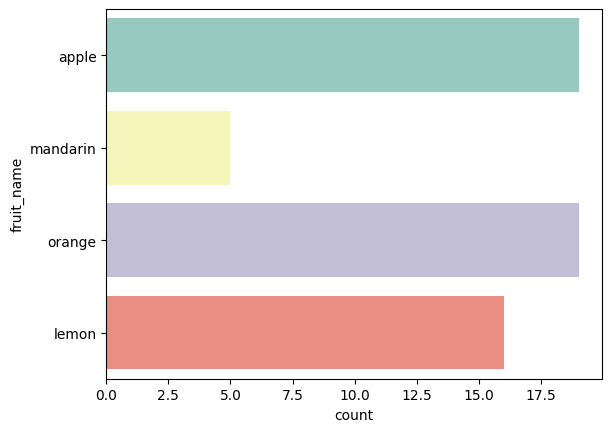

<ipython-input-9-223f56f4017b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")


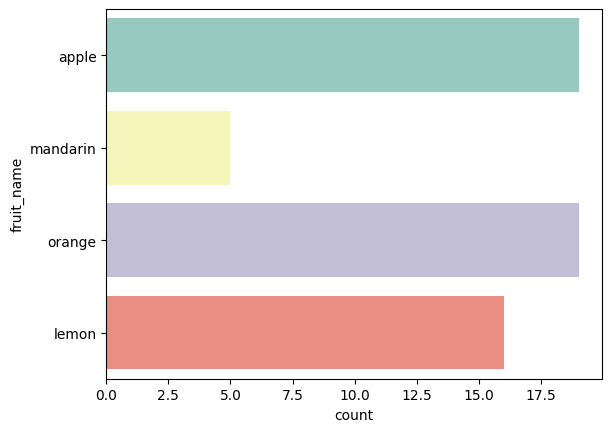

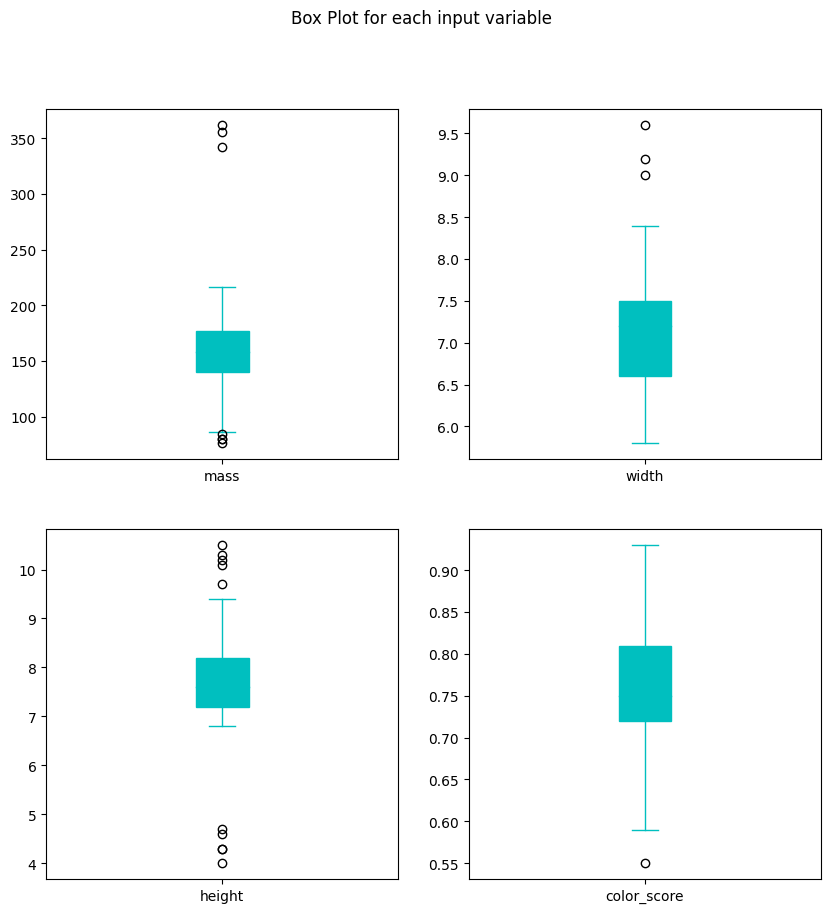

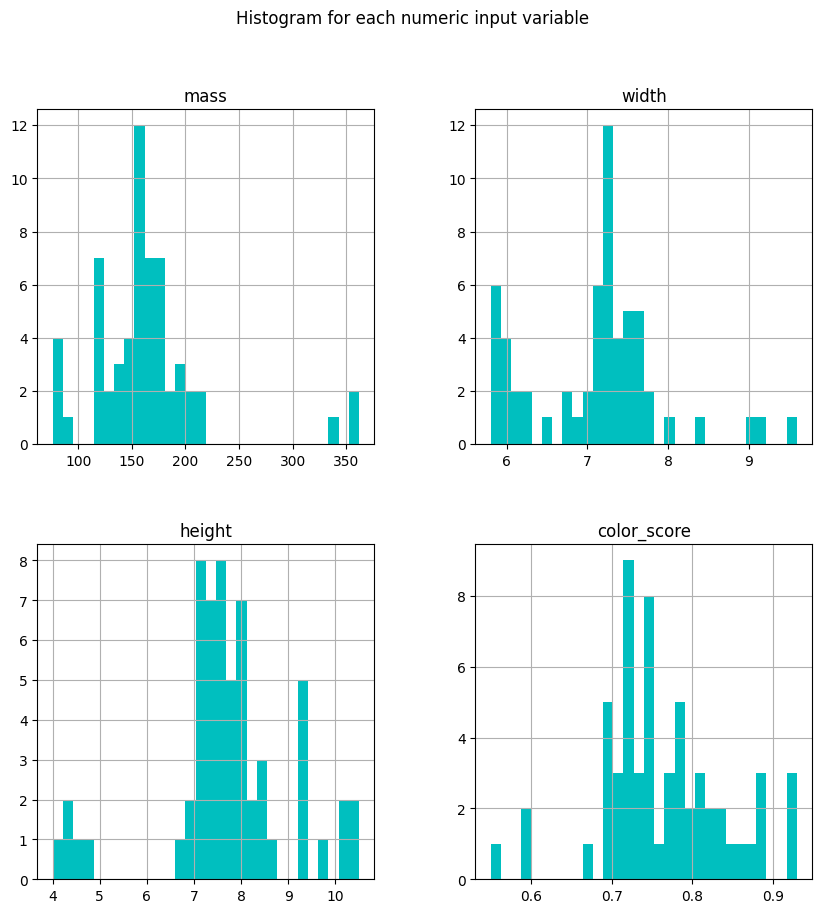

<ipython-input-9-223f56f4017b>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


Accuracy for K=5 :  0.5833333333333334
Accuracy for K=6 :  0.6666666666666666
Accuracy for K=7 :  0.6666666666666666
Accuracy for K=8 :  0.4166666666666667


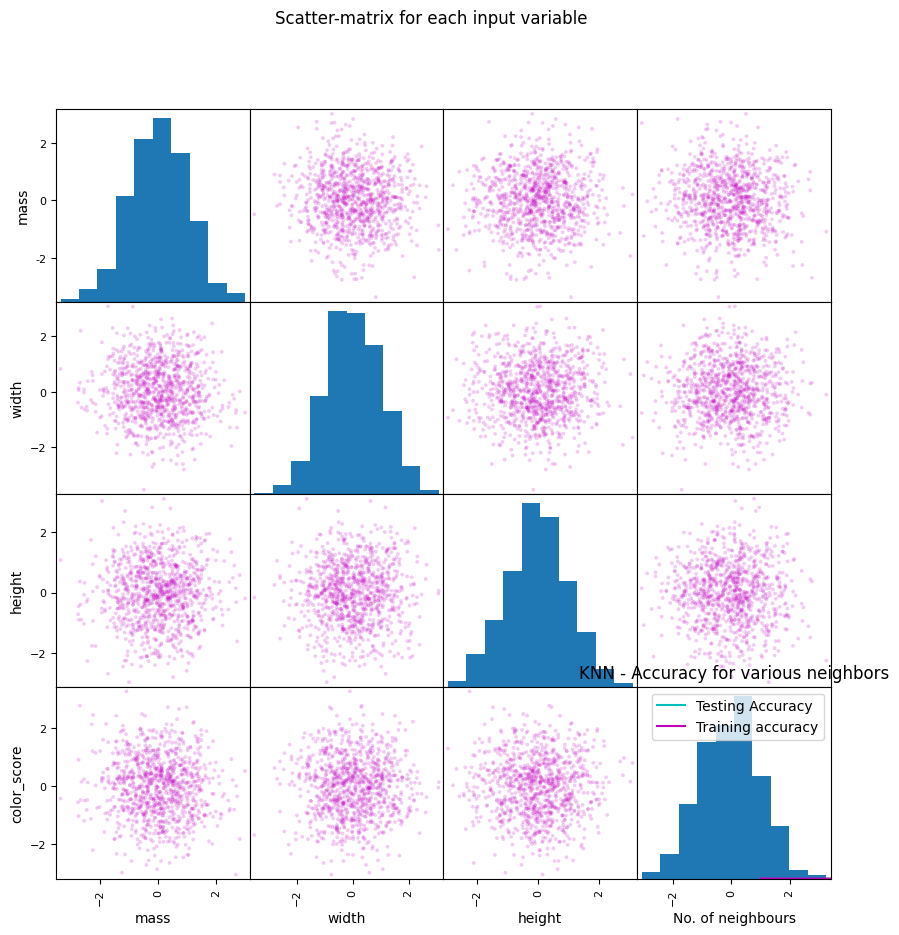

<Figure size 640x480 with 0 Axes>

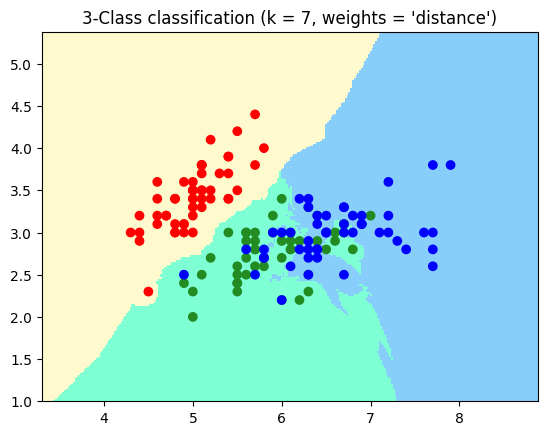

<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np

# for data manipulation, analysis and reading our dataset
import pandas as pd

# for plotting and visualising the data
import matplotlib.pyplot as plt
fruit = pd.read_csv('fruit_data_with_colours.csv')
import seaborn as sns

sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")
plt.show()


import seaborn as sns
import pylab as pl
sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")
plt.show()
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2),
                                        sharex=False, sharey=False, figsize=(10,10),
                                        color ='c', patch_artist=True)


pl.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

# PyLab is a module that belongs to the Python mathematics library Matplotlib.
# PyLab combines the numerical module numpy with the graphical plotting module pyplot


# To create a histogram, we will use pandas hist() method.
fruit.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,10), color = "c", ec = "m", lw=0)
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_histogram')
plt.show()


from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, cmap = cmap, figsize=(10,10), marker = '.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color = 'm')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

# First, import the KNeighborsClassifier module
# details about the module here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# In order to understand the model performance, divide the dataset into a training set and a test set.
# The split is done by using the function train_test_split()
# details here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split


# Split the dataset into two different datasets
# X for the independent features such as mass, width, height
# Y for the dependent feature i.e. fruit name
X = fruit[['mass','width','height','color_score']]
Y = fruit['fruit_name']

# Now split the dataset X into two separate sets — X_train and X_test
# Similarly, split the dataset Y into two sets — y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Notice the use of test_size. This parameter decides the size of the data that has to be split as the test dataset
# In the above case it is 0.2, which means that the dataset will be split 20% as the test dataset

X_train.describe()


X_test.describe()

knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, y_train)

# Model Accuracy, how often is the classifier correct?
# Accuracy can be computed by comparing actual test set values and predicted values.
# The score function is simply a utility function for a default metric to be used within some algorithms of scikit-learn
knn.score(X_test, y_test)
print("Accuracy for K=5 : ", knn.score(X_test, y_test))



knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=6 : ", knn.score(X_test, y_test))


knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=7 : ", knn.score(X_test, y_test))

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=8 : ", knn.score(X_test, y_test))

neighbours = np.arange(1,10)
training_accuracy = np.empty(len(neighbours))
testing_accuracy = np.empty(len(neighbours))
for i in range(len(neighbours)):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    training_accuracy[i] = knn.score(X_train,y_train)
    testing_accuracy[i] = knn.score(X_test,y_test)
plt.title('KNN - Accuracy for various neighbors')
plt.plot(neighbours, testing_accuracy, label = 'Testing Accuracy', color ='c')
plt.plot(neighbours, training_accuracy, label = 'Training accuracy', color ='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('knn - accuracy vs no of neighbours')


import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh

n_neighbors = 7

# Create color maps
cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
plt.savefig('classification chart')